# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

Count of records=  1016395
First 10 records: 
    Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28

First 10 records without columns "Unnamed: 0" oraz "Id" : 
        Name  Year Gender State  Count
0      Emma  2004      F    AK     62
1   Madison  2004      F    AK     48
2    Hannah  2004      F    AK     46
3     Grace  2004      F    AK     44
4     Emily  2004      F    AK     41
5   Abigail  2004      F    AK     37

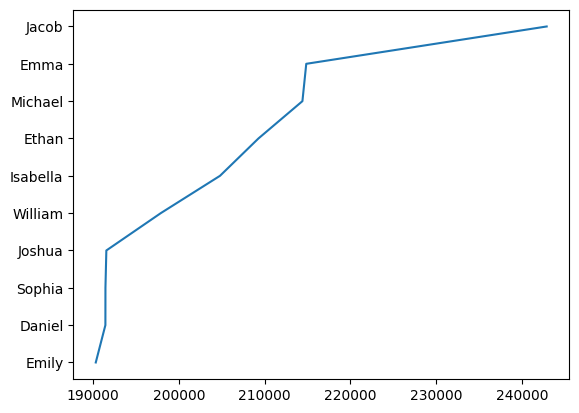

Count of all different names=  17632
The most popular name is  Jacob
Srednia=  2008.932168784029
Mediana=  49.0
Odchylenie standardowe=  11006.06946789057


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# 1, 2
baby_names = pd.read_csv("US_Baby_Names_right.csv")
print('Count of records= ', len(baby_names))

# 3
first10_baby_names = baby_names.head(10)
print('First 10 records: \n', first10_baby_names)

# 4
first10_baby_names_drop = first10_baby_names.drop(columns=['Unnamed: 0','Id' ])
print('\nFirst 10 records without columns "Unnamed: 0" oraz "Id" : \n', first10_baby_names_drop)
baby_names_drop = baby_names.drop(columns=['Unnamed: 0','Id' ])

# 5
count_of_F = baby_names_drop['Gender'].value_counts()['F']
count_of_M = baby_names_drop['Gender'].value_counts()['M']
print('Count of famales= ', count_of_F)
print('Count of males= ', count_of_M)
print('There are more famales') if count_of_F > count_of_M else print('There are more males') 

# 6
grouped = baby_names_drop['Count'].groupby(baby_names_drop['Name'])
grouped = grouped.sum().sort_values()
all_names = list(grouped.index)
grouped10 = grouped.tail(10)
print('\nMost popular names: \n',grouped10)

# 7
names = list(grouped10.index)
count = list(grouped10.values)

plt.plot(count, names)
plt.show()

# 8
print('Count of all different names= ', len(all_names))

# 9
weights = []
for name in all_names:
    count = baby_names['Name'].value_counts()[name]
    weights.append(count/len(baby_names))
random.choices(all_names, weights, k=1)

# 10
print('The most popular name is ', all_names[-1])
print('Srednia= ', grouped.mean())
print('Mediana= ', grouped.median())
print('Odchylenie standardowe= ', grouped.std())

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

Krok 8: Jak wiele różnych imion występuje w zbiorze?

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.


Count of observations=  943
Count of columns=  5
Names of columns:  ['user_id', 'age', 'gender', 'occupation', 'zip_code']
Count of different occupations =  21


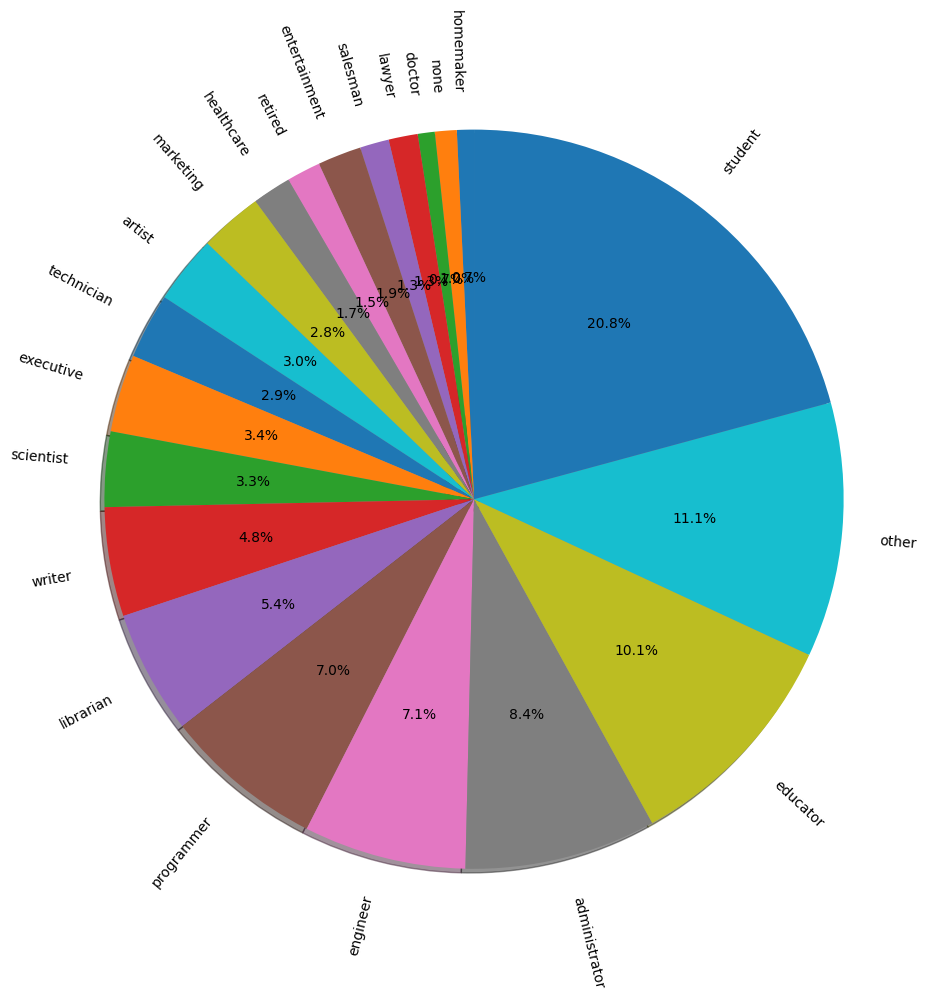

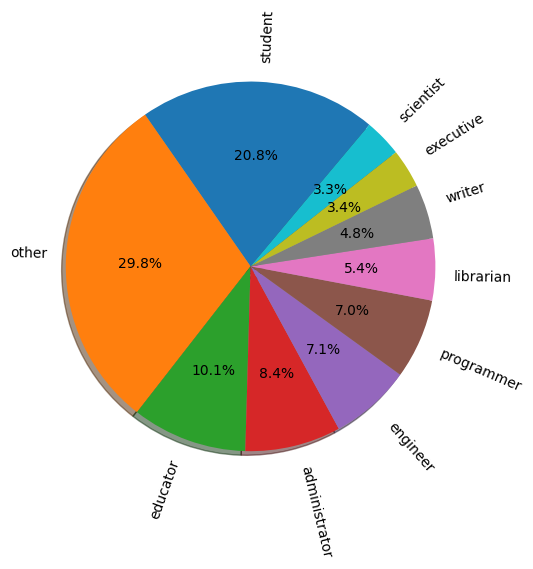

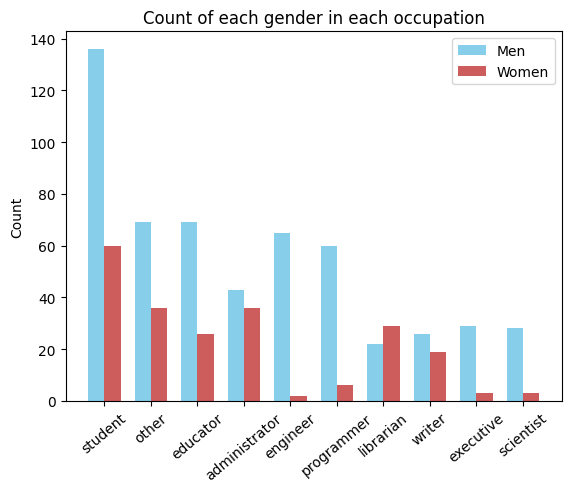

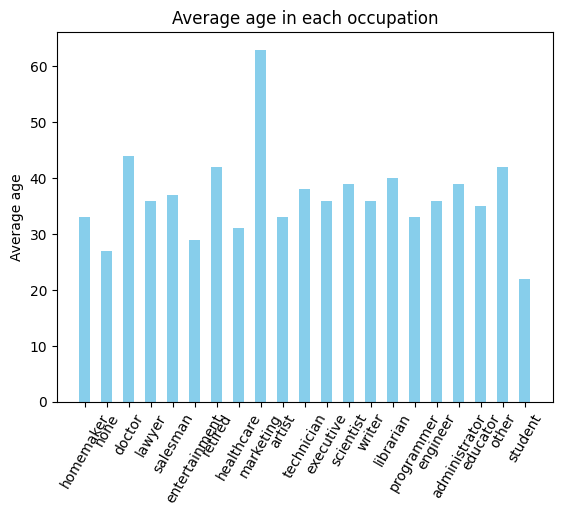

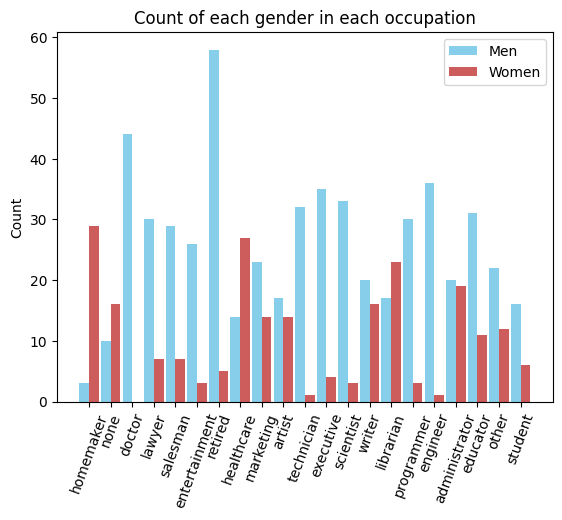

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1
ocupations = pd.read_csv("ocupation.csv", sep='|')

# 2
first25_ocupations = ocupations.head(25)
#print('First 25 records are:\n', first25_ocupations)

# 3
last10_ocupations = ocupations.tail(10)
#print('Last 25 records are: \n', last10_ocupations)

# 4
print('Count of observations= ', len(ocupations))
print('Count of columns= ', len(ocupations.columns))

# 5
print('Names of columns: ', list(ocupations.columns))

# 6
grouped = ocupations['user_id'].groupby(ocupations['occupation'])
grouped = grouped.sum().sort_values()
all_occupations = list(grouped.index)
print('Count of different occupations = ', len(all_occupations))

# 7
occupations_dict = {}
for occup in all_occupations:
    count = (ocupations['occupation']==occup).sum()
    occupations_dict.update({occup : (count / len(ocupations))})
    
# create plot
fig, ax = plt.subplots()
ax.pie(occupations_dict.values(), labels=occupations_dict.keys(), autopct='%1.1f%%',
       shadow=True, startangle=90, radius=2.5, rotatelabels=30)
plt.show()


sorted_occupations_dict = sorted(occupations_dict.items(), key=lambda x:x[1], reverse=True)
first10_occupation_dict_percent = {}
sum_of_others = 0
i = 0
for d in sorted_occupations_dict:
    first10_occupation_dict_percent.update({d[0]:d[1]})
    sum_of_others += d[1]
    i += 1
    if(i == 10): break
sum_of_others = 1 - sum_of_others
sum_of_others += occupations_dict['other']
first10_occupation_dict_percent.update({'other': sum_of_others})

# create plot
fig, ax = plt.subplots()
ax.pie(first10_occupation_dict_percent.values(), labels=first10_occupation_dict_percent.keys(), autopct='%1.1f%%',
       shadow=True, startangle=50, radius=1.25, rotatelabels=20)
plt.show()

# 8
count_of_F = []
count_of_M = []

for occup in first10_occupation_dict_percent.keys():
    occup_F = ocupations.loc[ocupations['gender']=='F'].loc[ocupations['occupation']==occup]
    count_of_F.append(len(occup_F.values))

    occup_M = ocupations.loc[ocupations['gender']=='M'].loc[ocupations['occupation']==occup]
    count_of_M.append(len(occup_M.values))

# plot
ind = np.arange(10)  
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, count_of_M, width,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, count_of_F, width, 
                color='IndianRed', label='Women')

ax.set_ylabel('Count')
ax.set_title('Count of each gender in each occupation')
ax.set_xticks(ind)
ax.set_xticklabels(first10_occupation_dict_percent.keys(), rotation=40)
ax.legend()

plt.show()

# 9
occupation_age = ocupations['age'].groupby(ocupations['occupation'])
occupation_age = occupation_age.sum().sort_values()

average_age = []
age = list(occupation_age.values)
i = 0
for occup in list(occupation_age.keys()):
    count = ocupations['occupation'].value_counts()[occup]
    average_age.append(round(age[i]/count))
    i+=1

# plot
ind = np.arange(len(all_occupations))  
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(ind, average_age, width, color='SkyBlue')
ax.set_ylabel('Average age')
ax.set_title('Average age in each occupation')
ax.set_xticks(ind)
ax.set_xticklabels(all_occupations, rotation=60)

plt.show()

# 10
average_age_of_F = []
average_age_of_M = []

for occup in all_occupations:
    count = ocupations['occupation'].value_counts()[occup]

    occup_F = ocupations.loc[ocupations['gender']=='F'].loc[ocupations['occupation']==occup]
    age = occup_F['age'].groupby(occup_F['occupation'])
    age = list(age.sum().sort_values())
    if(len(age)==0):
        age = [0]
    average_age_of_F.append(round(age[0]/count))


    occup_M = ocupations.loc[ocupations['gender']=='M'].loc[ocupations['occupation']==occup]
    age = occup_M['age'].groupby(occup_M['occupation'])
    age = list(age.sum().sort_values())
    if(len(age)==0):
        age = [0]
    average_age_of_M.append(round(age[0]/count))

# plot
ind = np.arange(len(all_occupations))  
width = 0.45
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, average_age_of_M, width,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, average_age_of_F, width, 
                color='IndianRed', label='Women')
ax.set_ylabel('Count')
ax.set_title('Count of each gender in each occupation')
ax.set_xticks(ind)
ax.set_xticklabels(all_occupations, rotation=70)
ax.legend()

plt.show()
